In [160]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from dmdholo.fields_propagation.fourier_filter import fourier_filter
from dmdholo.holograms.dmd_holograms import parallel_lee,  orthogonal_lee, holo_SP, holo_Haskell
from dmdholo.holograms.generate_LUT import generate_lut

from dmdholo.plotting.plot_funs import colorize
from dmdholo.plotting.specialized_functions import plot_holoWzoom, plot_four, \
    add_linesNcircs, plot_amp_phase_proj

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Helvetica') 

plt.rcParams.update({"figure.facecolor" : "white"})


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Quantization of complex values

(-0.5, 767.5, 767.5, -0.5)

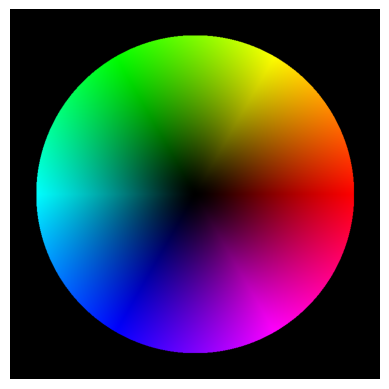

In [176]:
nx = 768 ; ny = 768
X,Y = np.meshgrid(np.arange(nx)-nx/2,np.arange(ny)-ny/2)
rad_vort = 330
X /= rad_vort
Y /= rad_vort
sc = 2*rad_vort/nx
vortex_disk = (X-1j*Y)*(X**2+Y**2<1**2)
vortex_disk /= np.max(np.abs(vortex_disk))
target_field = vortex_disk
plt.imshow(colorize(target_field))
plt.gca().axis('off')

(-0.5, 767.5, 767.5, -0.5)

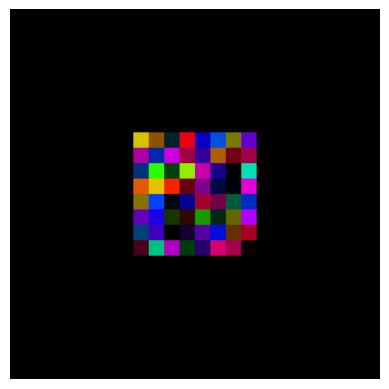

In [162]:
from piston_1 import DMDPiston

n = 8
dmd = DMDPiston(n_act_1d=n, roi_size=256)
dmd.generate_fields(n, rand_amp=True, rand_phi=True)
target_field = dmd.field_matrix
target_field /= np.max(np.abs(target_field))

plt.imshow(colorize(target_field))
plt.gca().axis('off')

## 3. Optimally tilted holograms ($p_y = p_x^2$)

### $p_x=3$


First we define the parameters for the holograms

In [163]:
px = 3
nuvec = np.array((1/px, 1/px**2)) 
SA_filter = 1.0*np.linalg.norm(nuvec)/6

Then we compute the holograms, note that for the Haskell we first need to compute the LUT

In [164]:
f_val_hask, px_comb_hask, lut_hask = generate_lut('sp', px)
holo = holo_SP(target_field, lut_hask, px_comb_hask)

Finally, we compute the shaped fields

In [165]:
shaped_field, ft_holo = fourier_filter(holo, nuvec, SA_filter, get_ft=True)
cent = np.array((1/px + 0*0.01/px, 1/px**2 + 0*0.01/px)) 
shaped_field, ft_holo = fourier_filter(holo, cent , SA_filter, get_ft=True)

Then we plot the results

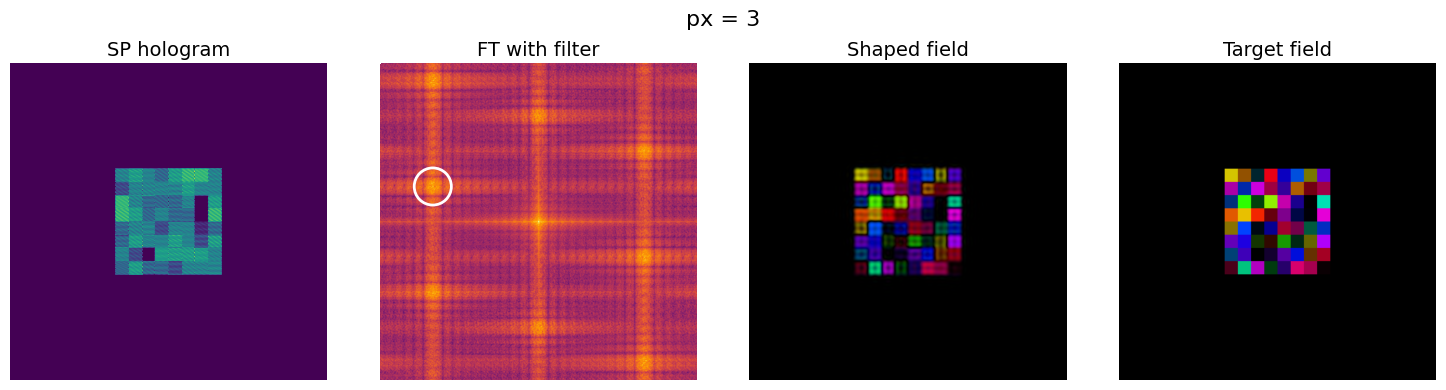

In [166]:
plt.figure(figsize=(15, 4))

plt.suptitle(f"px = {px}")

plt.subplot(1, 4, 1)
plt.imshow(holo)
plt.axis('off')
plt.title('SP hologram')

plt.subplot(1, 4, 2)
# plot_four(ft_holo, ap_loc=nuvec, ap_rad=SA_filter)
plot_four(ft_holo, ap_loc=cent, ap_rad=SA_filter)
plt.axis('off')
plt.title('FT with filter')

plt.subplot(1, 4, 3)
plt.imshow(colorize(shaped_field))
plt.axis('off')
plt.title('Shaped field')

plt.subplot(1, 4, 4)
plt.imshow(colorize(target_field))
plt.axis('off')
plt.title('Target field')

plt.tight_layout()

Text(0.5, 1.0, 'Diff field')

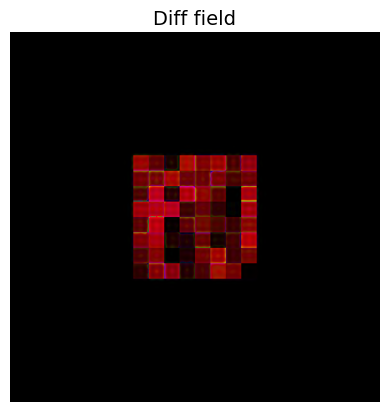

In [167]:
diff_field = np.abs(np.abs(shaped_field) - np.abs(target_field)) * np.exp(1j * (np.angle(shaped_field) - np.angle(target_field)))

plt.imshow(colorize(diff_field))
plt.axis('off')
plt.title('Diff field')

Plot the errors

In [168]:
err_amp = np.abs(shaped_field) - np.abs(target_field)
err_amp_norm = np.abs(shaped_field) / np.max(np.abs(shaped_field)) - np.abs(target_field) / np.max(np.abs(target_field))
err_phi = np.angle(np.exp(1j * (np.angle(shaped_field) - np.angle(target_field))))

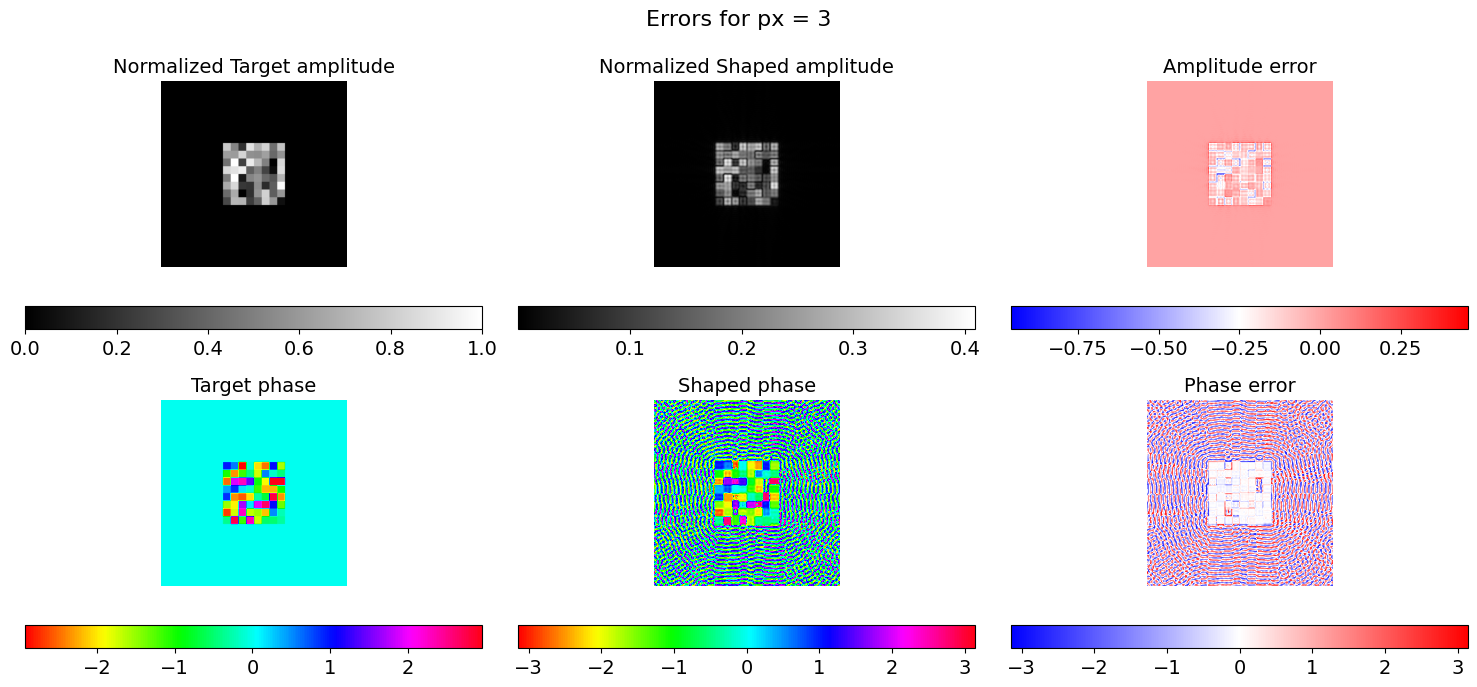

In [169]:
plt.figure(figsize=(15, 7))

plt.suptitle(f"Errors for px = {px}")

plt.subplot(2, 3, 1)
plt.imshow(np.abs(target_field), cmap='gray')
plt.title('Normalized Target amplitude')
plt.colorbar(location = 'bottom')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(np.abs(shaped_field), cmap='gray')
plt.title('Normalized Shaped amplitude')
plt.colorbar(location = 'bottom')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(err_amp_norm, cmap='bwr')
plt.title('Amplitude error')
plt.colorbar(location = 'bottom')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(np.angle(target_field), cmap='hsv')
plt.title('Target phase')
plt.colorbar(location = 'bottom')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(np.angle(shaped_field), cmap='hsv')
plt.title('Shaped phase')
plt.colorbar(location = 'bottom')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(err_phi, cmap='bwr')
plt.title('Phase error')
plt.colorbar(location = 'bottom')
plt.axis('off')

plt.tight_layout()

### $p_x=4$


In [182]:
# First we define the parameters for the holograms
px = 4
nuvec = np.array((1/px + 0*0.05/px,1/px**2)) 
SA_filter = 1.0*np.linalg.norm(nuvec)/4
SA_filter = 1/px/4

# Then we compute the holograms, note that for the Haskell we first need to compute the LUT
f_val_hask, px_comb_hask, lut_hask = generate_lut('sp', px)
holo = holo_SP(target_field, lut_hask, px_comb_hask)

# Finally, we compute the shaped fields
shaped_field, ft_holo = fourier_filter(holo, nuvec, SA_filter, get_ft=True)


cent = np.array((0*1/px + 1/px/4, 1/px**2 + 0/px/4))
cent = nuvec
shaped_field, ft_holo = fourier_filter(holo, cent , SA_filter, get_ft=True)

Then we plot the results

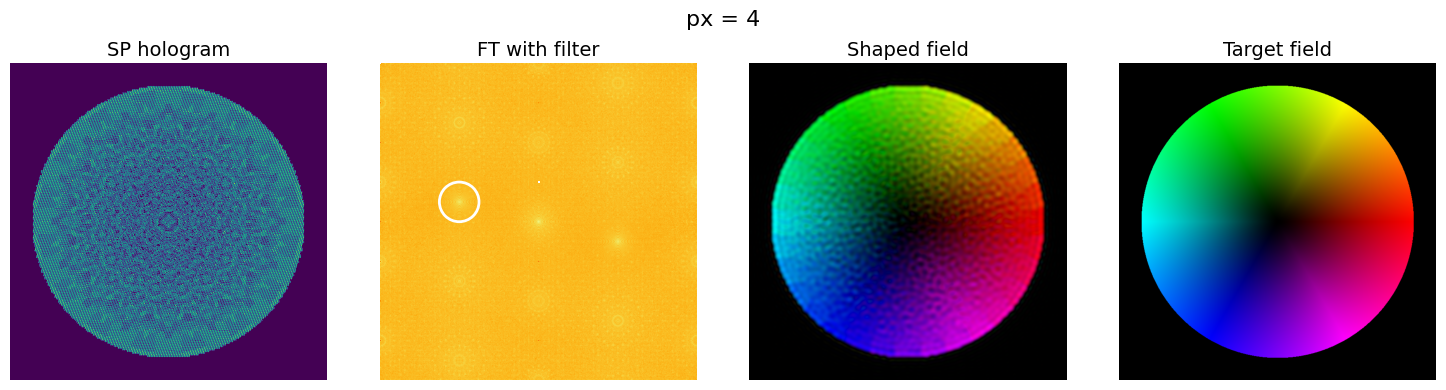

In [184]:
plt.figure(figsize=(15, 4))

plt.suptitle(f"px = {px}")

plt.subplot(1, 4, 1)
plt.imshow(holo)
plt.axis('off')
plt.title('SP hologram')

plt.subplot(1, 4, 2)
# plot_four(ft_holo, ap_loc=nuvec, ap_rad=SA_filter)
plot_four(ft_holo, ap_loc=cent, ap_rad=SA_filter)
plt.axis('off')
plt.title('FT with filter')

plt.subplot(1, 4, 3)
plt.imshow(colorize(shaped_field))
plt.axis('off')
plt.title('Shaped field')

plt.subplot(1, 4, 4)
plt.imshow(colorize(target_field))
plt.axis('off')
plt.title('Target field')

plt.tight_layout()

Text(0.5, 1.0, 'Diff field')

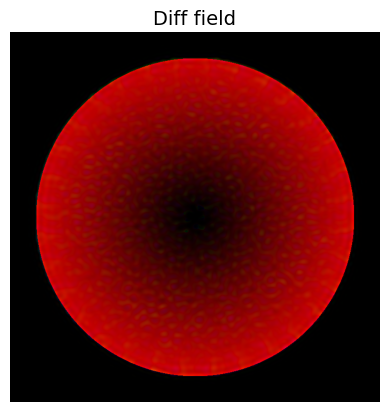

In [185]:
diff_field = np.abs(np.abs(shaped_field) - np.abs(target_field)) * np.exp(1j * (np.angle(shaped_field) - np.angle(target_field)))

plt.imshow(colorize(diff_field))
plt.axis('off')
plt.title('Diff field')

Plot the errors

In [180]:
err_amp = np.abs(shaped_field) - np.abs(target_field)
err_amp_norm = np.abs(shaped_field) / np.max(np.abs(shaped_field)) - np.abs(target_field) / np.max(np.abs(target_field))
err_phi = np.angle(np.exp(1j * (np.angle(shaped_field) - np.angle(target_field))))

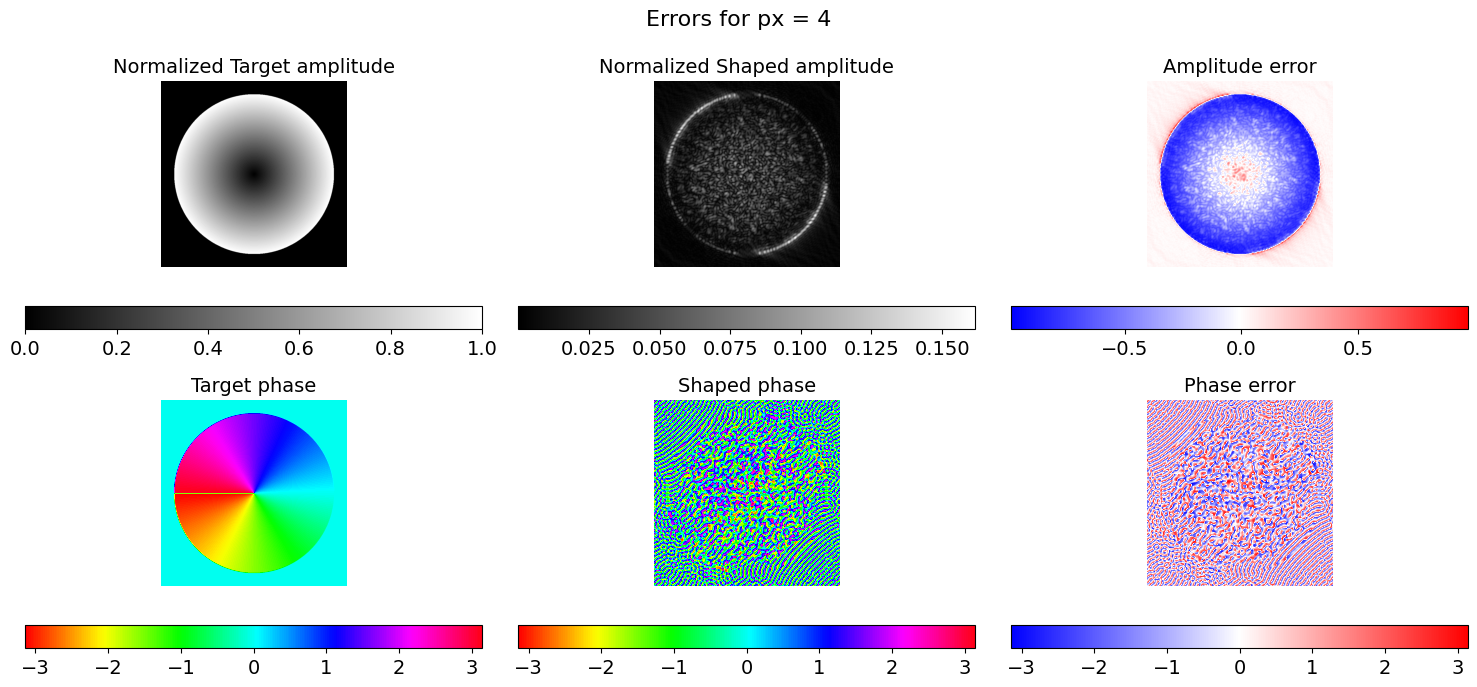

In [181]:
plt.figure(figsize=(15, 7))

plt.suptitle(f"Errors for px = {px}")

plt.subplot(2, 3, 1)
plt.imshow(np.abs(target_field), cmap='gray')
plt.title('Normalized Target amplitude')
plt.colorbar(location = 'bottom')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(np.abs(shaped_field), cmap='gray')
plt.title('Normalized Shaped amplitude')
plt.colorbar(location = 'bottom')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(err_amp_norm, cmap='bwr')
plt.title('Amplitude error')
plt.colorbar(location = 'bottom')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(np.angle(target_field), cmap='hsv')
plt.title('Target phase')
plt.colorbar(location = 'bottom')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(np.angle(shaped_field), cmap='hsv')
plt.title('Shaped phase')
plt.colorbar(location = 'bottom')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(err_phi, cmap='bwr')
plt.title('Phase error')
plt.colorbar(location = 'bottom')
plt.axis('off')

plt.tight_layout()